## TITANIC DATASET

* We all remember the story of Jack and Rose in TITANIC :( .. very romantic but sad story.
* Well, we want to use a machine learning Model to determine if a passenger on that ship survived or not.
* since it is a classification problem, we will use the LOGISTIC REGRESSION METHOD

#### The info in the data set include
* Passengerid- passenger's ID
* Survived - if the passenger survived or not
* Pclass - Economic class of passenger
* Name - Name of passenger
* Sex - sex of passenger 
* Age - age of passenger(Years)
* SibSp - no of siblings/spouse
* Parch -no of parents/children
* Ticket - ticket number
* Fare - Passenger Fare
* Cabin - cabin number
* Embarked - port of embarkation


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATA
##### firstly, i will read the train data  into pandas dataframe using pd.read_csv

In [157]:
titanic = pd.read_csv('train.csv')

In [158]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis 
 Looking at the dataset above, some values are seen to be misssing. so first, we have to deal with missing values.
 
 let's create a heatmap using seaborn to view all the rows with missing values

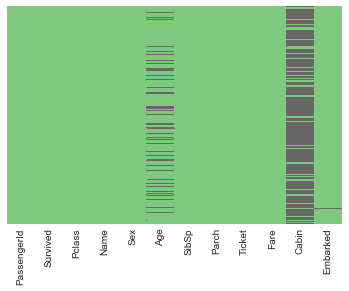

In [159]:
sns.heatmap(titanic.isnull(),cmap='Accent',yticklabels=False,cbar=False)

looking at the heatmap above, it can be seen that we only have missing values in the Embarked, Age and Cabin column
* The Age column has fewer number of missing column and a considerable amount that can be replaced maybe by using the age.
* the cabin column has so many missing values. we can decide to drop the enitre column.
* While the Embarked missing value is just on a row so we just drop the row in that column


##### Considering that we are looking at chances of survival, we can carry out more visualization on the survival column.

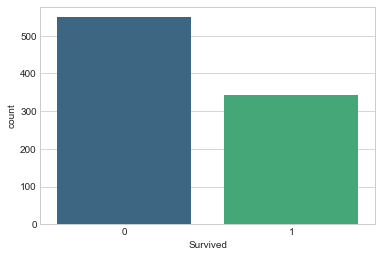

In [160]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = titanic, palette = 'viridis')

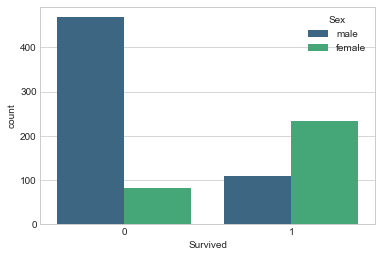

In [161]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue ='Sex' , data = titanic, palette = 'viridis')

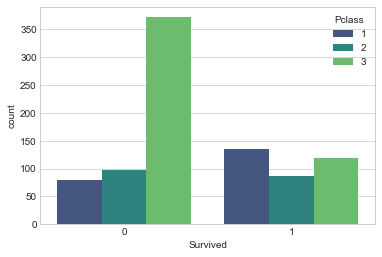

In [162]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue ='Pclass' , data = titanic, palette = 'viridis')

#### From the 3 countplots, we can be seen that:
* Lesser number of passengers survived.
* More male than female died
* More passenger in the 3rd class died

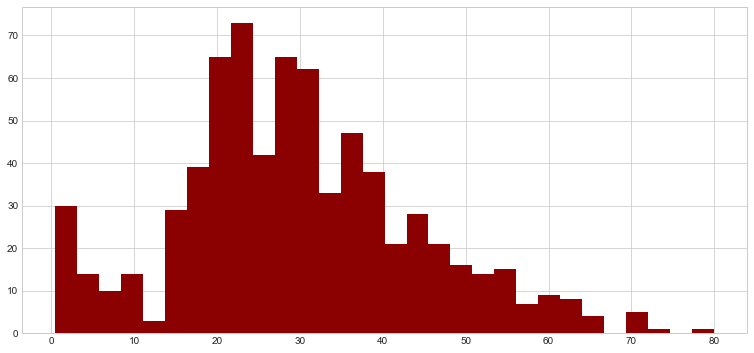

In [163]:
titanic['Age'].hist(color = 'darkred', bins = 30, figsize= (13,6));

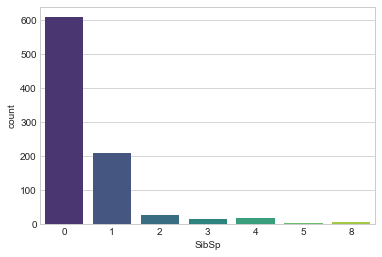

In [164]:
sns.countplot(x= 'SibSp', data = titanic, palette= 'viridis')

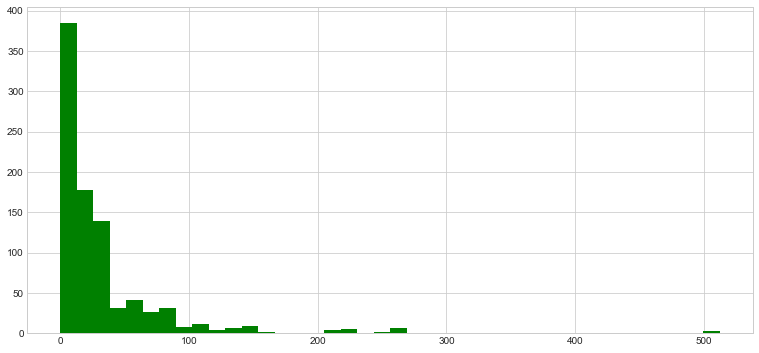

In [165]:
titanic['Fare'].hist(color = 'green', bins = 40,figsize = (13,6))

## Data Cleaning

We already know that we have missing values in the Age column but the values are not so much. So instead of dropping the whole column, we can carry out imputation i.e replace the missing values with the mean age. To make it more accurate we can do the mean ages by the passenger's class(first,second or third class).

Let's begin by plotting a boxplot of Ages by Pclass

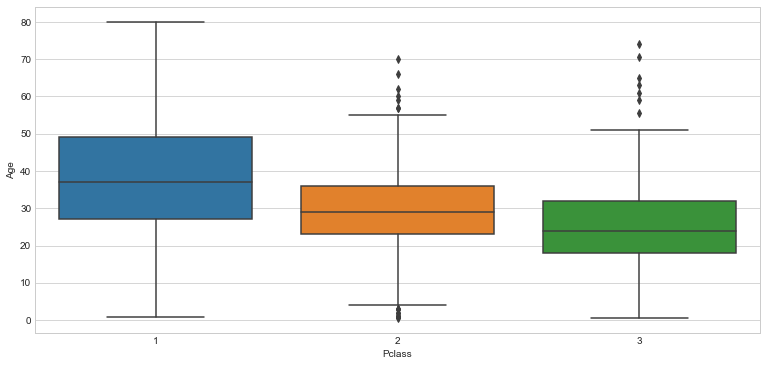

In [166]:
plt.figure(figsize = (13,6))
sns.boxplot(x = 'Pclass',y = 'Age', data = titanic);
        

The box plot above shows that richer passengers tend to be older.
* Next, we have have to get the values of the mean and median  of the Age by grouping by class

In [167]:
titanic.groupby('Pclass').median()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [168]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


after getting their mean, we create a function that will replace the missing values by the various mean of Age

In [169]:
def replace_age(col):
    Pclass = col[0]
    Age = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 25
    else:
        return Age
        

In [170]:
titanic['Age'] = titanic[['Pclass','Age']].apply(replace_age, axis = 1)

so lets visualize the heatmap again to see if the missing values under the Age column has been replaced

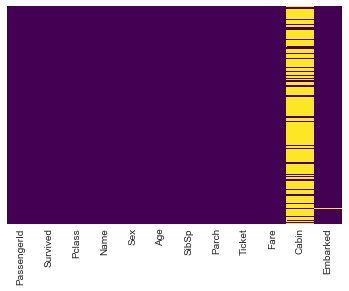

In [171]:
sns.heatmap(titanic.isnull(), yticklabels=False,cbar=False,cmap= 'viridis')

## yipieeee!!!!
we have succeeded in replacing the missing values under the Age column
#### next we would have to drop the cabin column

In [172]:
titanic.drop('Cabin',axis=1,inplace=True)

In [173]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


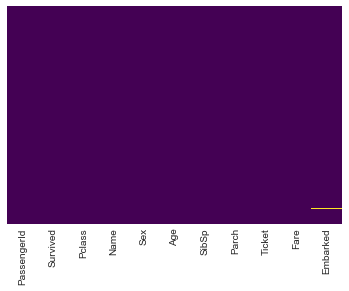

In [174]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

the Cabin column has been dropped.
* however, it can still be seen that a row in the Embarked column still has some missing values.
we would just drop all missing values 

In [175]:
titanic.dropna(inplace=True)

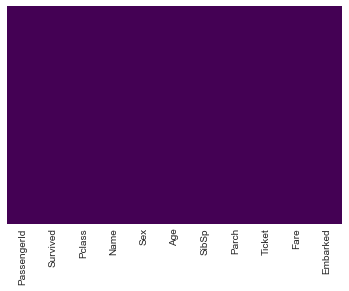

In [176]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

All the missing values have been taken care of.

In [177]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB



### Machine learning (logistic regression) algorithm works with binary variables i.e '1' for True and '0' for False.

* some of the features we are working with on this data are 'Sex' and 'Embarked' are categorical features. we will have to convert them to dummy variables

In [178]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [179]:
titanic.drop(['Sex','Embarked','Name','Ticket'], axis = 1,inplace=True)

In [180]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [181]:
titanic= pd.concat([titanic,sex,embark],axis=1)

In [182]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#### We now have a clean data to work with!!!.
 ###### we proceed to building our model
 

In [186]:
x = titanic.drop('Survived',axis = 1)
y = titanic['Survived']

## Spliting data
we will then proceed to splitting our data into train and test data

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

## Training of model and prediction

In [188]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
y_pred = logistic_regression.predict(x_test)

## Confusion matrix

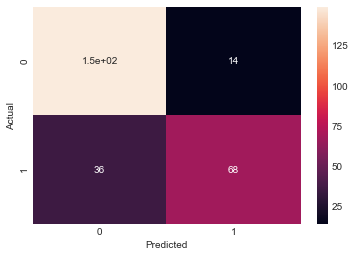

In [191]:
confusion_matrix = pd.crosstab(y_test,y_pred,rownames = ['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [193]:
confusion_matrix

Predicted,0,1
Actual,,
0,149,14
1,36,68


As Obeserved from the matrix, :
* TP = True Positive = 149
* TN = True Negative = 68
* FP = False Positive = 14
* FN = False Negative = 36


In [207]:
TP = 149
TN = 68
FP = 14
FN = 36
Total = (TP+TN+FP+FN)
Accuracy = (TP+TN)/Total
Accuracy

0.8127340823970037

 ## Accuracy

In [208]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8127340823970037

# CONCLUSION



We have a model that is 81% accurate that can predict the survival of a passenger on the titanic boat